In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [2]:
main = pd.read_csv("../data/raw/ethiopia_fi_unified_data.csv")
impacts = pd.read_csv("../data/raw/ethiopia_fi_unified_data - Impact_sheet.csv")
ref = pd.read_csv("../data/raw/reference_codes.csv")

### Understand the Schema

#### Data Overview
- `main` contains observations, events, and targets
- `impacts` contains impact_link records linking events to indicators
- `ref` provides valid codes for categorical fields


In [19]:
# Quick check of shapes
print("Main dataset shape:", main.shape)
print("Impact links dataset shape:", impacts.shape)
print("Reference codes dataset shape:", ref.shape)

Main dataset shape: (43, 34)
Impact links dataset shape: (14, 35)
Reference codes dataset shape: (71, 4)


#### Schema Consistency Check

In [4]:
print("Columns match:", set(main.columns) == set(impacts.columns))

# Extra/missing columns
print("Columns in main but not in impacts:", set(main.columns) - set(impacts.columns))
print("Columns in impacts but not in main:", set(impacts.columns) - set(main.columns))

Columns match: False
Columns in main but not in impacts: set()
Columns in impacts but not in main: {'parent_id'}


- Columns mostly match
- `impact_links` has an extra `parent_id` column linking events to indicators
- This is expected and aligns with the unified schema design

####  Record Types


In [20]:
print("\n### Record Type Counts")
print("Main dataset:\n", main['record_type'].value_counts())
print("Impact dataset:\n", impacts['record_type'].value_counts())


### Record Type Counts
Main dataset:
 record_type
observation    30
event          10
target          3
Name: count, dtype: int64
Impact dataset:
 record_type
impact_link    14
Name: count, dtype: int64


### Explore the Data

#### Pillars Distribution
- Show how many records are assigned to each pillar (ACCESS, USAGE, etc.)
- `NaN` values indicate records where pillar is not pre-assigned (like events)

In [21]:
pillar_counts = main['pillar'].value_counts(dropna=False)
print(pillar_counts)

pillar
ACCESS           16
USAGE            11
NaN              10
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64


TypeError: 'value' must be an instance of str or bytes, not a float

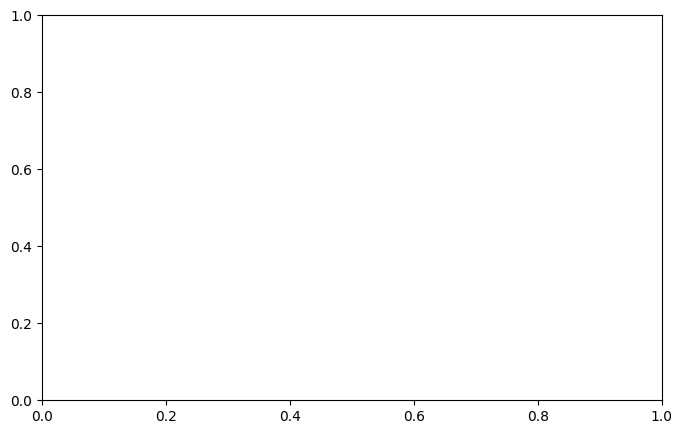

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=main, x='pillar', order=pillar_counts.index)
plt.title("Records per Pillar (including NaN for events)")
plt.ylabel("Count")
plt.xlabel("Pillar")
plt.xticks(rotation=45)
plt.show()

#### Confidence & Source Types
- `confidence` shows the reliability of the data (high, medium, low)
- `source_type` shows if the record came from survey, operator report, official policy, etc.

In [24]:
print("\n Confidence Counts")
print(main['confidence'].value_counts())
print("\n Source Types Counts")
print(main['source_type'].value_counts())


 Confidence Counts
confidence
high      40
medium     3
Name: count, dtype: int64

 Source Types Counts
source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64


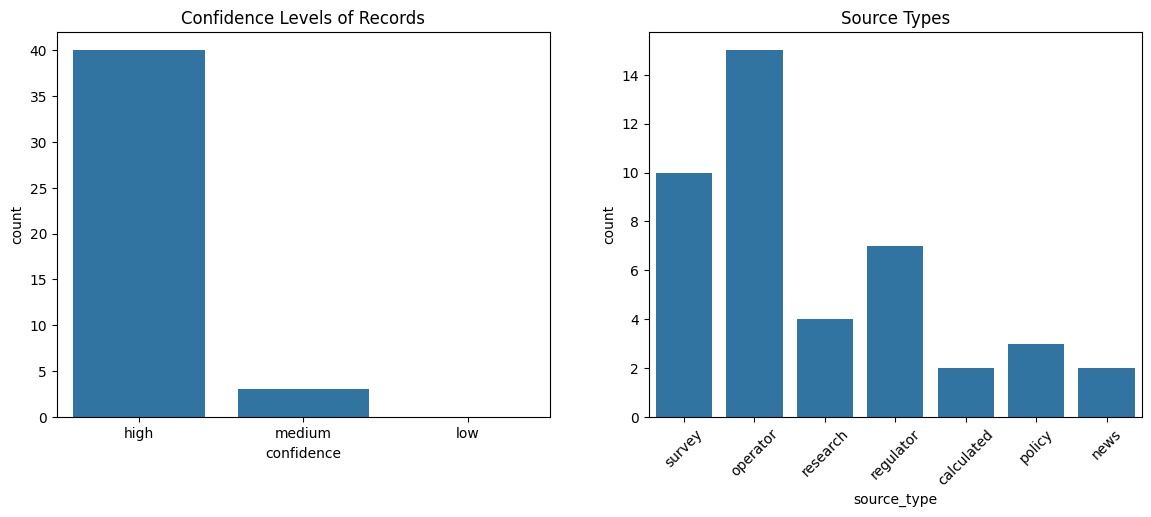

In [25]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.countplot(ax=axes[0], data=main, x='confidence', order=['high','medium','low'])
axes[0].set_title("Confidence Levels of Records")
sns.countplot(ax=axes[1], data=main, x='source_type')
axes[1].set_title("Source Types")
axes[1].tick_params(axis='x', rotation=45)
plt.show()

#### Temporal Range of Observations 

In [27]:
obs = main[main['record_type'] == 'observation']
print("\nObservation Date Range")
print("Earliest:", obs['observation_date'].min())
print("Latest:", obs['observation_date'].max())


Observation Date Range
Earliest: 2014-12-31
Latest: 2025-12-31


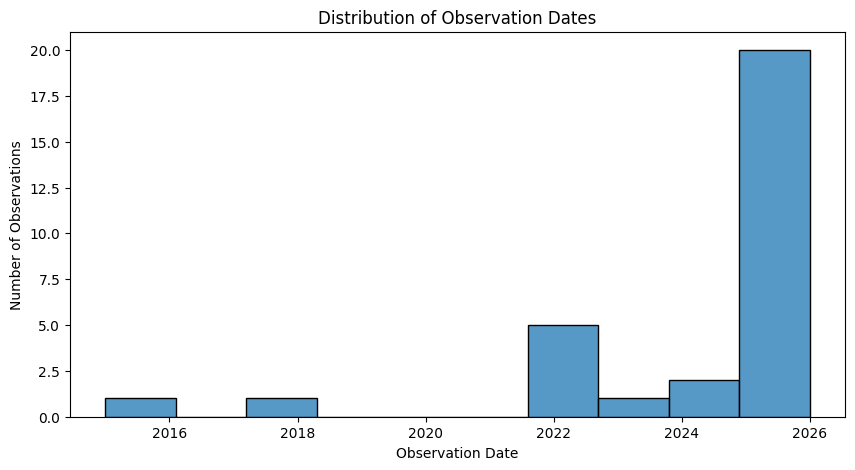

In [28]:
plt.figure(figsize=(10,5))
obs['observation_date'] = pd.to_datetime(obs['observation_date'])
sns.histplot(obs, x='observation_date', bins=10)
plt.title("Distribution of Observation Dates")
plt.xlabel("Observation Date")
plt.ylabel("Number of Observations")
plt.show()

#### Unique Indicators and Coverage

In [29]:
indicator_counts = obs['indicator_code'].value_counts()
print("\nIndicators and Coverage")
print(indicator_counts)


Indicators and Coverage
indicator_code
ACC_OWNERSHIP         6
ACC_FAYDA             3
ACC_MM_ACCOUNT        2
ACC_4G_COV            2
USG_P2P_COUNT         2
GEN_GAP_ACC           2
ACC_MOBILE_PEN        1
USG_P2P_VALUE         1
USG_ATM_COUNT         1
USG_ATM_VALUE         1
USG_CROSSOVER         1
USG_TELEBIRR_USERS    1
USG_TELEBIRR_VALUE    1
USG_MPESA_USERS       1
USG_MPESA_ACTIVE      1
USG_ACTIVE_RATE       1
AFF_DATA_INCOME       1
GEN_MM_SHARE          1
GEN_GAP_MOBILE        1
Name: count, dtype: int64


#### Map indicators to pillars


In [ ]:
pillars = obs.groupby(['pillar','indicator_code']).size().reset_index(name='count')
print("\nIndicators per pillar:\n", pillars)


Indicators per pillar:
            pillar      indicator_code  count
0          ACCESS          ACC_4G_COV      2
1          ACCESS           ACC_FAYDA      3
2          ACCESS      ACC_MM_ACCOUNT      2
3          ACCESS      ACC_MOBILE_PEN      1
4          ACCESS       ACC_OWNERSHIP      6
5   AFFORDABILITY     AFF_DATA_INCOME      1
6          GENDER         GEN_GAP_ACC      2
7          GENDER      GEN_GAP_MOBILE      1
8          GENDER        GEN_MM_SHARE      1
9           USAGE     USG_ACTIVE_RATE      1
10          USAGE       USG_ATM_COUNT      1
11          USAGE       USG_ATM_VALUE      1
12          USAGE       USG_CROSSOVER      1
13          USAGE    USG_MPESA_ACTIVE      1
14          USAGE     USG_MPESA_USERS      1
15          USAGE       USG_P2P_COUNT      2
16          USAGE       USG_P2P_VALUE      1
17          USAGE  USG_TELEBIRR_USERS      1
18          USAGE  USG_TELEBIRR_VALUE      1


#### Events Catalog


In [31]:
events = main[main['record_type'] == 'event']
print("\n Events Catalog")
print(events[['record_id','indicator','category','observation_date']])


 Events Catalog
   record_id                               indicator        category  \
33  EVT_0001                         Telebirr Launch  product_launch   
34  EVT_0002    Safaricom Ethiopia Commercial Launch    market_entry   
35  EVT_0003                  M-Pesa Ethiopia Launch  product_launch   
36  EVT_0004        Fayda Digital ID Program Rollout  infrastructure   
37  EVT_0005         Foreign Exchange Liberalization          policy   
38  EVT_0006     P2P Transaction Count Surpasses ATM       milestone   
39  EVT_0007            M-Pesa EthSwitch Integration     partnership   
40  EVT_0008  EthioPay Instant Payment System Launch  infrastructure   
41  EVT_0009                 NFIS-II Strategy Launch          policy   
42  EVT_0010       Safaricom Ethiopia Price Increase         pricing   

   observation_date  
33       2021-05-17  
34       2022-08-01  
35       2023-08-01  
36       2024-01-01  
37       2024-07-29  
38       2024-10-01  
39       2025-10-27  
40       2025-

In [34]:
event_counts = events['category'].value_counts()
print("\nEvent counts by category:\n", event_counts)


Event counts by category:
 category
product_launch    2
infrastructure    2
policy            2
market_entry      1
milestone         1
partnership       1
pricing           1
Name: count, dtype: int64


### Impact Links Overview

In [ ]:
# Merge impact_links with their parent events to see the full relationships
impact_full = impacts.merge(events[['record_id','indicator','category','observation_date']],
                            left_on='parent_id', right_on='record_id',
                            how='left',
                            suffixes=('_impact','_event'))


Impact Links per Pillar
pillar
USAGE            6
ACCESS           4
AFFORDABILITY    3
GENDER           1
Name: count, dtype: int64


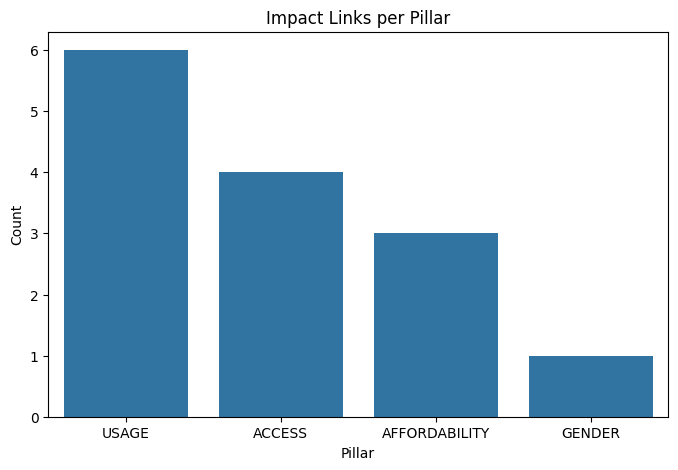

In [33]:
impact_counts = impact_full['pillar'].value_counts()
print("\nImpact Links per Pillar")
print(impact_counts)

# Visualize Impact Links per Pillar
plt.figure(figsize=(8,5))
sns.countplot(data=impact_full, x='pillar', order=impact_counts.index)
plt.title("Impact Links per Pillar")
plt.ylabel("Count")
plt.xlabel("Pillar")
plt.show()